In [ ]:
# !pip install matplotlib
# !pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_precios = pd.read_csv("CSVs/df_precios.csv")
df_productos = pd.read_csv("CSVs/df_productos.csv")
df_supermercados = pd.read_csv("CSVs/df_supermercados.csv")

In [16]:
df_precios.columns

Index(['Nombre_producto', 'Fecha', 'Precio', 'Supermercado', 'Categoría',
       'Variación'],
      dtype='object')

In [43]:
df_precios["Categoría"].unique()

array(['aceite de girasol', 'aceite de oliva', 'leche'], dtype=object)

C:\Users\Víctor\AppData\Local\Temp\ipykernel_17236\3430471486.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


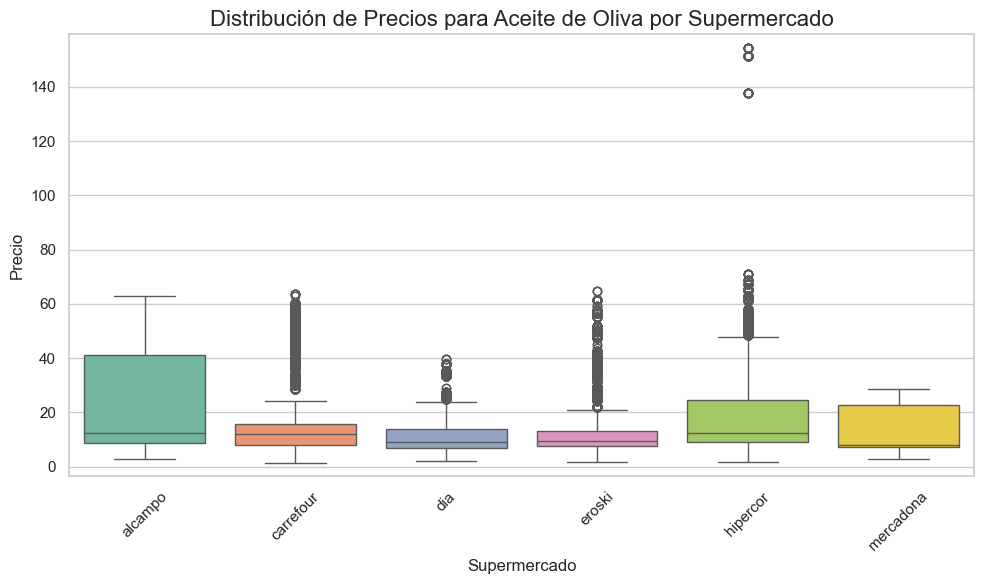

In [44]:

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'aceite de oliva']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'Aceite de Oliva'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para Aceite de Oliva por Supermercado', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        x='Supermercado',
        y='Precio',
        palette='Set2'
    )

    # Ajustar los límites del eje y
    plt.ylim(df_aceite['Precio'].min() - 5, df_aceite['Precio'].max() + 5)

    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()

C:\Users\Víctor\AppData\Local\Temp\ipykernel_17236\1736682726.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


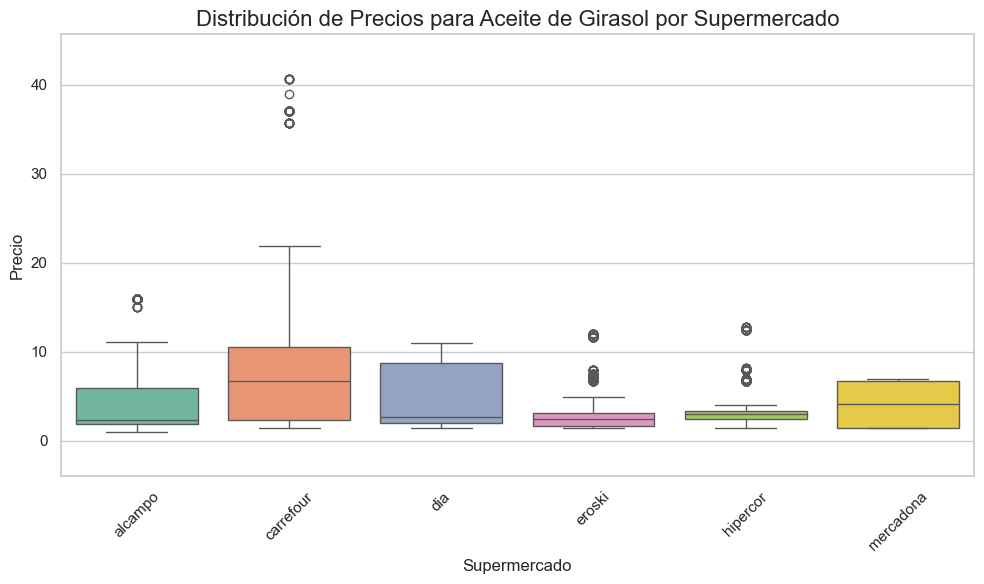

In [39]:

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'aceite de girasol']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'Aceite de Girasol'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para Aceite de Girasol por Supermercado', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        x='Supermercado',
        y='Precio',
        palette='Set2'
    )

    # Ajustar los límites del eje y
    plt.ylim(df_aceite['Precio'].min() - 5, df_aceite['Precio'].max() + 5)

    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()


C:\Users\Víctor\AppData\Local\Temp\ipykernel_17236\3430353094.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


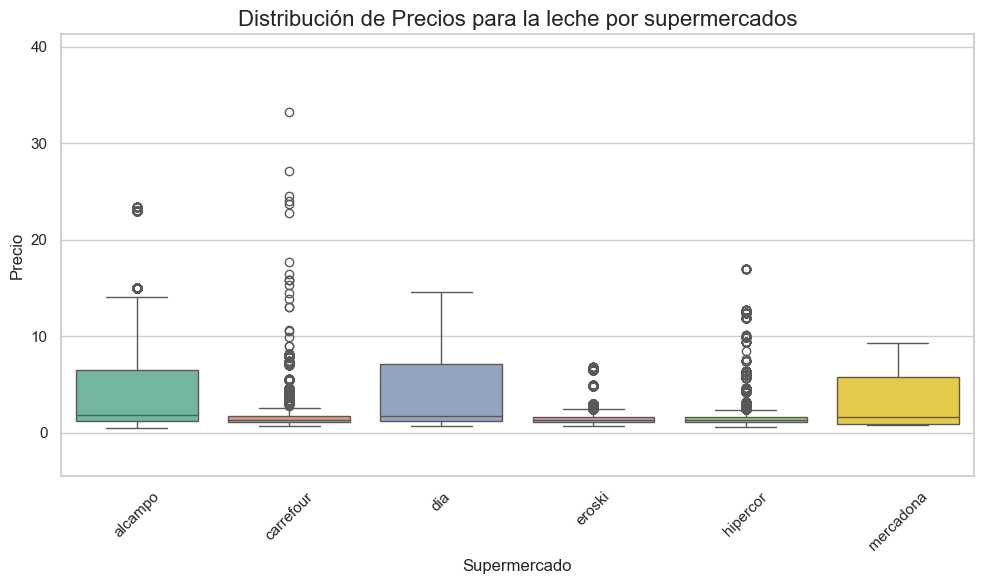

In [67]:

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Filtrar el dataframe solo para "Aceite de Girasol"
df_aceite = df_precios[df_precios['Categoría'] == 'leche']

# Asegurarse de que no haya valores NaN o infinitos en la columna 'Precio'
df_aceite = df_aceite.dropna(subset=['Precio'])  # Eliminar filas con NaN en 'Precio'
df_aceite = df_aceite[~df_aceite['Precio'].isin([float('inf'), float('-inf')])]  # Eliminar infinitos

# Verificar si hay datos después del filtrado
if df_aceite.empty:
    print("No hay datos disponibles para la categoría 'leche'.")
else:
    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.title('Distribución de Precios para la leche por supermercados', fontsize=16)

    # Crear el boxplot
    sns.boxplot(
        data=df_aceite,
        x='Supermercado',
        y='Precio',
        palette='Set2'
    )

    # Ajustar los límites del eje y
    plt.ylim(df_aceite['Precio'].min() - 5, df_aceite['Precio'].max()-5)

    # Etiquetas
    plt.xlabel('Supermercado')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.tight_layout()
    plt.show()


In [ ]:

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Agrupar por fecha y categoría, y calcular la media de los precios
df_media_precios = df_precios.groupby(['Fecha', 'Categoría'])['Precio'].mean().reset_index()

# Crear la figura
plt.figure(figsize=(14, 7))
plt.title('Histórico de Precios Promedio por Fecha y Categoría', fontsize=16)

# Crear el lineplot para cada categoría
sns.lineplot(data=df_media_precios, x='Fecha', y='Precio', hue='Categoría', marker='o')

# Ajustes de los ejes
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.legend(title='Categoría')  # Añadir leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Advertencia: No se encontró un color para la categoría 'leche'. Usando azul por defecto.


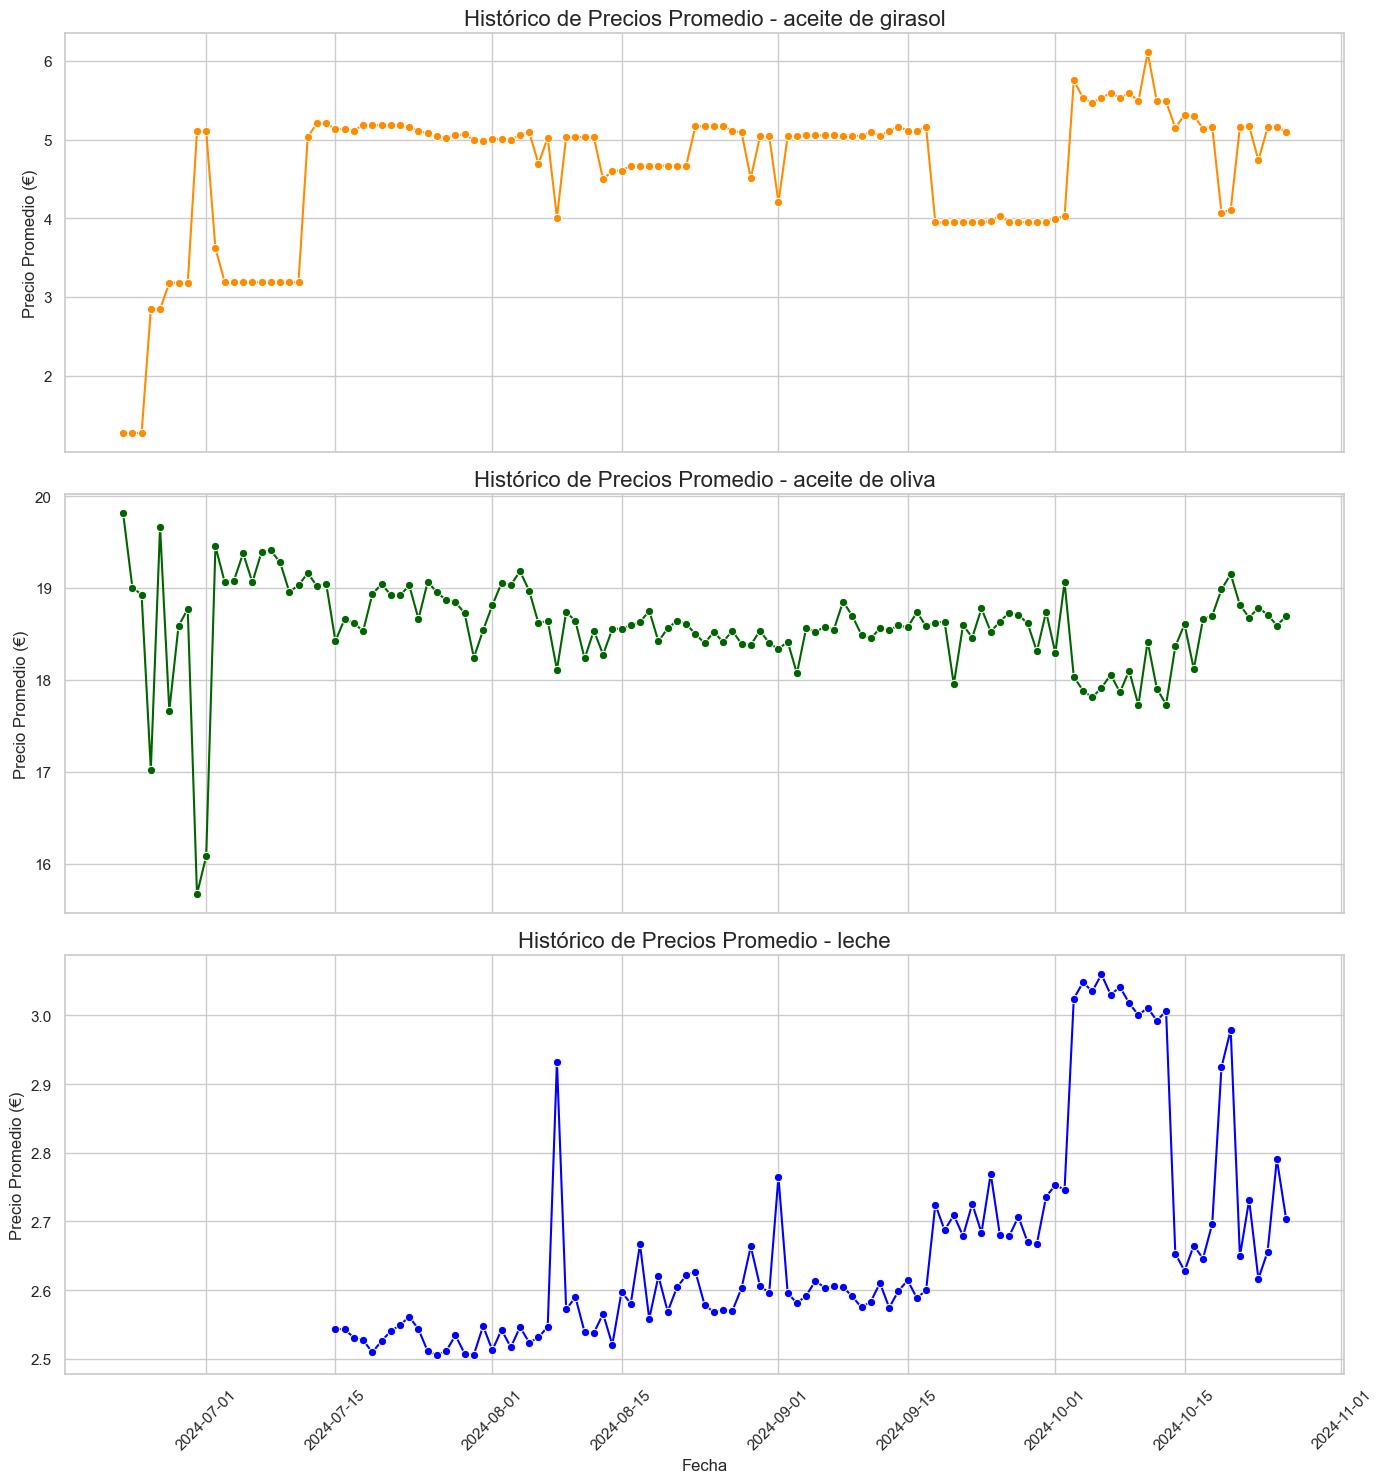

In [65]:

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Agrupar por fecha y categoría, y calcular la media de los precios
df_media_precios = df_precios.groupby(['Fecha', 'Categoría'])['Precio'].mean().reset_index()

# Crear un conjunto de subplots, uno por cada categoría
categorias = df_media_precios['Categoría'].unique()
n_categorias = len(categorias)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_categorias, 1, figsize=(14, 5 * n_categorias), sharex=True)

# Definir colores para cada categoría
colores = {
    'aceite de girasol': 'darkorange',
    'aceite de oliva': 'darkgreen'
}

# Asegurarse de que los ejes se muestren correctamente
for i, categoria in enumerate(categorias):
    # Filtrar los datos para la categoría actual
    df_categoria = df_media_precios[df_media_precios['Categoría'] == categoria]
    
    # Obtener el color correspondiente; si la categoría no está en el diccionario, lanzar un aviso
    color = colores.get(categoria)
    if color is None:
        print(f"Advertencia: No se encontró un color para la categoría '{categoria}'. Usando azul por defecto.")
        color = 'blue'  # color de respaldo en caso de que la categoría no esté definida

    # Crear el lineplot para la categoría actual con el color correspondiente
    sns.lineplot(data=df_categoria, x='Fecha', y='Precio', marker='o', ax=axes[i], color=color)
    
    # Configurar el título y etiquetas
    axes[i].set_title(f'Histórico de Precios Promedio - {categoria}', fontsize=16)
    axes[i].set_ylabel('Precio Promedio (€)')
    
    # Añadir cuadrícula
    axes[i].grid(True)

# Ajustar el eje x para todos los subplots
axes[-1].set_xlabel('Fecha')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


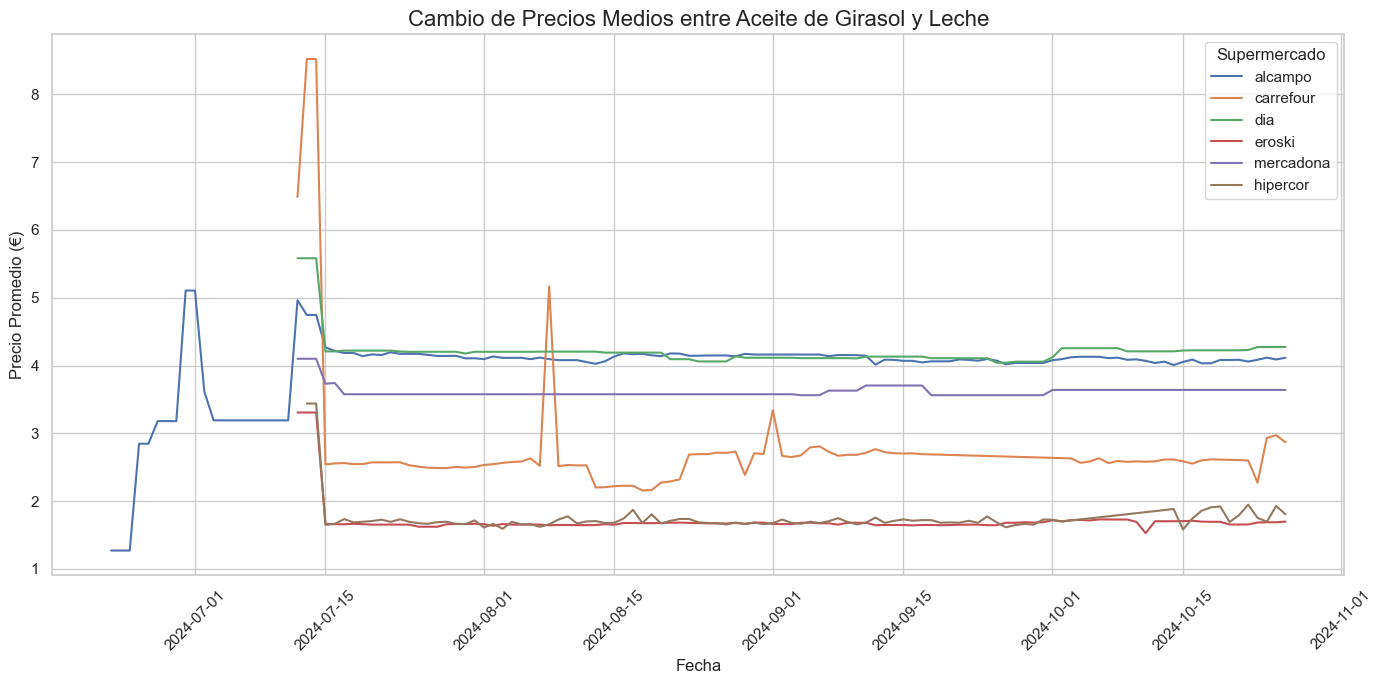

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo
sns.set(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Filtrar el DataFrame para incluir solo los productos deseados
productos_deseados = ['aceite de girasol', 'leche']  # Categorías en minúsculas
df_filtrado = df_precios[df_precios['Categoría'].isin(productos_deseados)]

# Agrupar por fecha y supermercado, y calcular la media de los precios de ambas categorías
df_media_precios = df_filtrado.groupby(['Fecha', 'Supermercado'])['Precio'].mean().reset_index()

# Crear un DataFrame que contenga la media entre aceite de girasol y leche
df_media_combined = df_media_precios.groupby(['Fecha', 'Supermercado']).mean().reset_index()

# Crear el lineplot para las medias de precios a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_media_combined, x='Fecha', y='Precio', hue='Supermercado', markers=True, dashes=False)

# Configurar el título y etiquetas
plt.title('Cambio de Precios Medios entre Aceite de Girasol y Leche', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


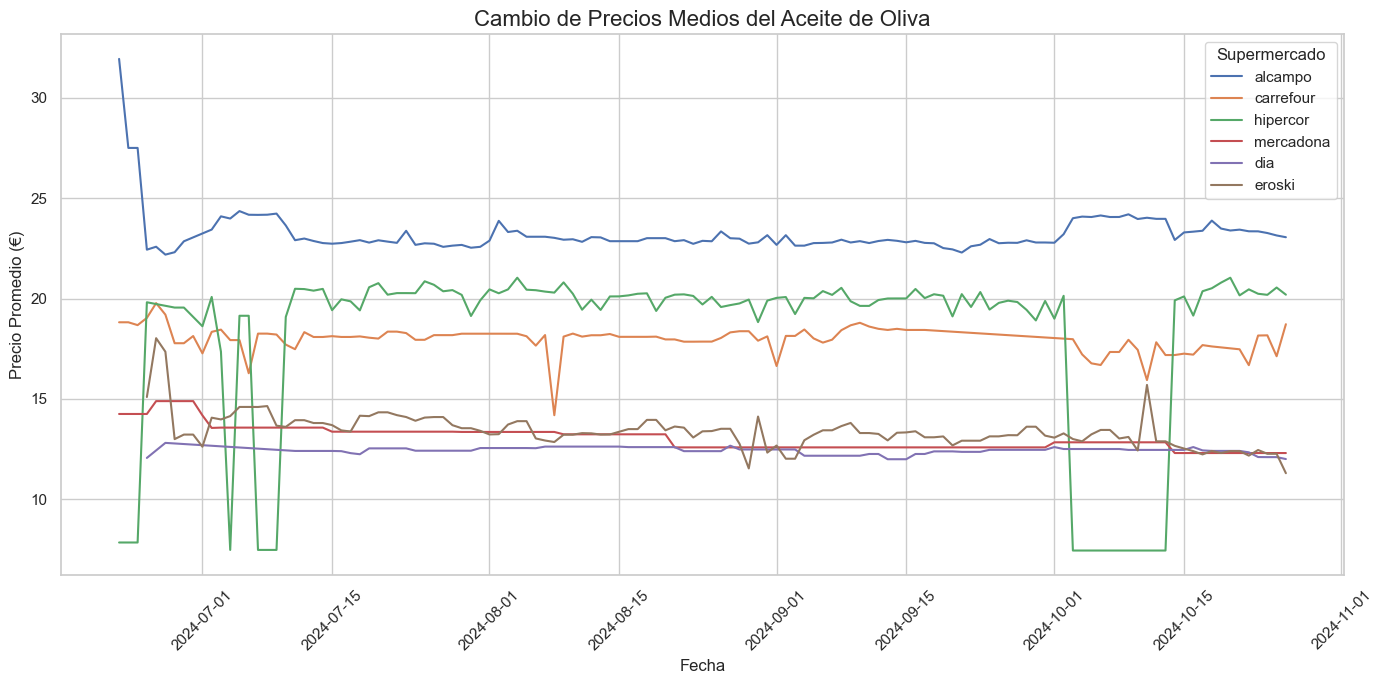

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el estilo
sns.set(style="whitegrid")

# Asegurarse de que la columna 'Fecha' esté en formato de fecha
df_precios['Fecha'] = pd.to_datetime(df_precios['Fecha'])

# Filtrar el DataFrame para incluir solo el aceite de oliva
categoria_deseada = 'aceite de oliva'  # Categoría en minúsculas
df_filtrado = df_precios[df_precios['Categoría'] == categoria_deseada]

# Agrupar por fecha y supermercado, y calcular la media de los precios
df_media_precios = df_filtrado.groupby(['Fecha', 'Supermercado'])['Precio'].mean().reset_index()

# Crear el lineplot para las medias de precios a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_media_precios, x='Fecha', y='Precio', hue='Supermercado', markers=True, dashes=False)

# Configurar el título y etiquetas
plt.title('Cambio de Precios Medios del Aceite de Oliva', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
